Some key concepts used in this notebook are:
* dictionaries for storing data https://docs.python.org/2/tutorial/datastructures.html#dictionaries
* xarray for reading NetCDF files http://xarray.pydata.org/
* Matplotlib gridspec for making multiple panels https://matplotlib.org/tutorials/intermediate/gridspec.html#sphx-glr-tutorials-intermediate-gridspec-py
* Cartopy for plotting geographical data https://scitools.org.uk/cartopy/docs/latest/index.html
* loading external `.py` files using `autoreload`, so that any changes take effect immediately. Big shout out to André for this one https://ipython.org/ipython-doc/3/config/extensions/autoreload.html

In [1]:
import xarray as xr
import os, os.path
import sys
import scipy
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker

from glob import glob

import cartopy.crs as ccrs

%matplotlib inline

In [2]:
matplotlib.__version__

'3.0.2'

In [3]:
xr.__version__

'0.11.0'

# Setup

In [4]:
Tfrz = 273.15 # Freezing point of water

In [5]:
# Name some Cartopy projections for ease of use
myproj = ccrs.PlateCarree()
myproj2 = ccrs.NorthPolarStereo()

In [6]:
# Shared python files ('libs')
sys.path.insert(0,'.')
#sys.path.insert(0,'/glade/u/home/lvank/analysis/cesm2_cmip/libpycesm')

# IPython extension to reload modules before executing user code.
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload

%aimport libtimeseries 
%aimport libplot

# Reload all modules imported with %aimport every time before executing the Python code typed.
%autoreload 1

# Load data

In [7]:

seasons = 'ANN', 'JJA', 'DJF', 'MAM', 'SON'
merra_seasons = {}
for season in seasons:
    merra_seasons[season] = {}


with xr.open_dataset("/Users/leo/workspace/data/MERRA2/H500_ymonmean_1deg.nc") as ds:
    var = ds.H500
    for season in seasons:
        merra_seasons[season]['Z500'] = libtimeseries.month_to_season(var, season) / 10. # m to dam
        
with xr.open_dataset("/Users/leo/workspace/data/MERRA2/T500_ymonmean_1deg.nc") as ds:
    var = ds.T500
    for season in seasons:
        merra_seasons[season]['T500'] = libtimeseries.month_to_season(var, season)  - Tfrz

In [8]:
merra_seasons.keys()

dict_keys(['ANN', 'JJA', 'DJF', 'MAM', 'SON'])

# Plot data

Text(0.5, 1.0, 'MERRA2 Z500 JJA')

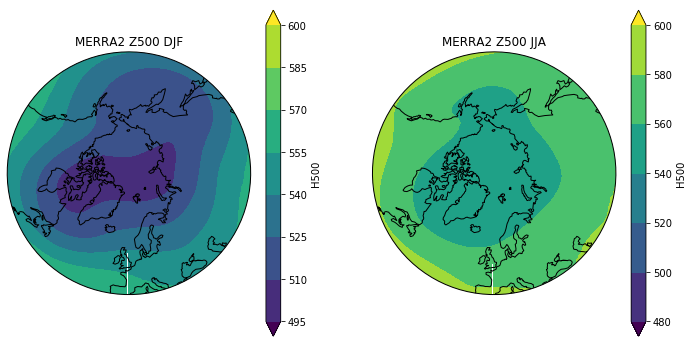

In [9]:
fig = plt.figure(figsize=(12,6))
gs = gridspec.GridSpec(1, 2, figure=fig)


data = merra_seasons['DJF']['Z500']
ax = libplot.define_north_polar_map(fig, sps=gs[0,0])
cn = data.plot.contourf(ax=ax, transform=myproj, add_colorbar=True,extend='both')
ax.set_title('MERRA2 Z500 DJF')


data = merra_seasons['JJA']['Z500']
ax = libplot.define_north_polar_map(fig, sps=gs[0,1])
cn = data.plot.contourf(ax=ax, transform=myproj, add_colorbar=True,extend='both')
ax.set_title('MERRA2 Z500 JJA')


There is a white line at 0 longitude. This is a known "feature" of Cartopy. The workaround is to create a so-called "cyclic" point which is basically an extra longitude 365+1 to fill the white space. I've contacted the developer of Xarray, Stefan Hoyer, about this issue and he came up with a nice wrapper function https://github.com/pydata/xarray/issues/1005

(192, 289)
(192, 289)


/Users/leo/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/Users/leo/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


Text(0.5, 1.0, 'MERRA2 T500 JJA')

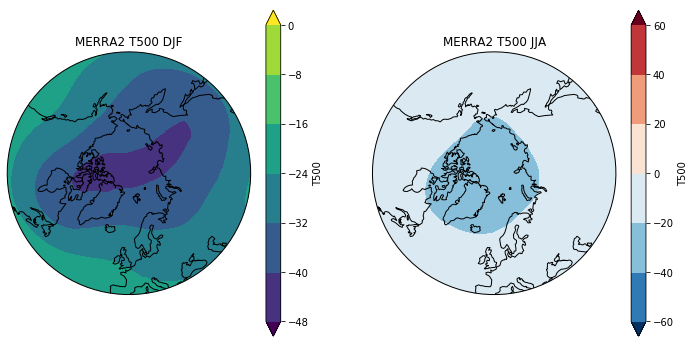

In [13]:
fig = plt.figure(figsize=(12,6))
gs = gridspec.GridSpec(1, 2, figure=fig)

varname = 'T500'

data = merra_seasons['DJF'][varname]
datac = libplot.add_cyclic_point(data, dim='lon', period=360) # cyclic point to avoid gap
print(datac.shape)
ax = libplot.define_north_polar_map(fig, sps=gs[0,0])
cn = datac.plot.contourf(ax=ax, transform=myproj, add_colorbar=True,extend='both')
ax.set_title('MERRA2 '+varname+' DJF')


data = merra_seasons['JJA'][varname]
datac = libplot.add_cyclic_point(data, dim='lon', period=360) # cyclic point to avoid gap
print(datac.shape)
ax = libplot.define_north_polar_map(fig, sps=gs[0,1])
cn = datac.plot.contourf(ax=ax, transform=myproj, add_colorbar=True,extend='both')
ax.set_title('MERRA2 '+varname+' JJA')




